<a href="https://colab.research.google.com/github/cindylrs04/PCVK25_3F_06/blob/main/Week3_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cindy Laili Larasati - 06

# PRAKTIKUM

# D1. Operasi Citra Sederhana

Akses folder images pada Google Drive Anda dengan kode berikut:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Transformasi Linier Brightness

 Mengubahtingkat kecerahan citra 
---------------------------------
Masukkan nilai kecerahan: 50


/tmp/ipython-input-2552726818.py:19: RuntimeWarning: overflow encountered in scalar add
  brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)


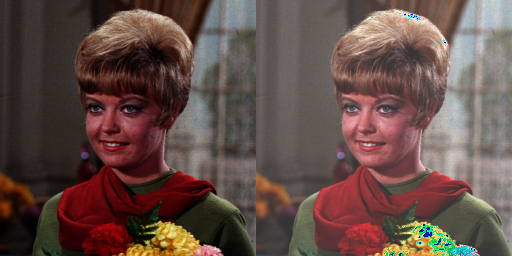

In [5]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print(' Mengubahtingkat kecerahan citra ')
print('---------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_06/Gambar/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simpel tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta-brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

# TUGAS PRAKTIKUM D1

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:
*Gunakan Gambar KTM

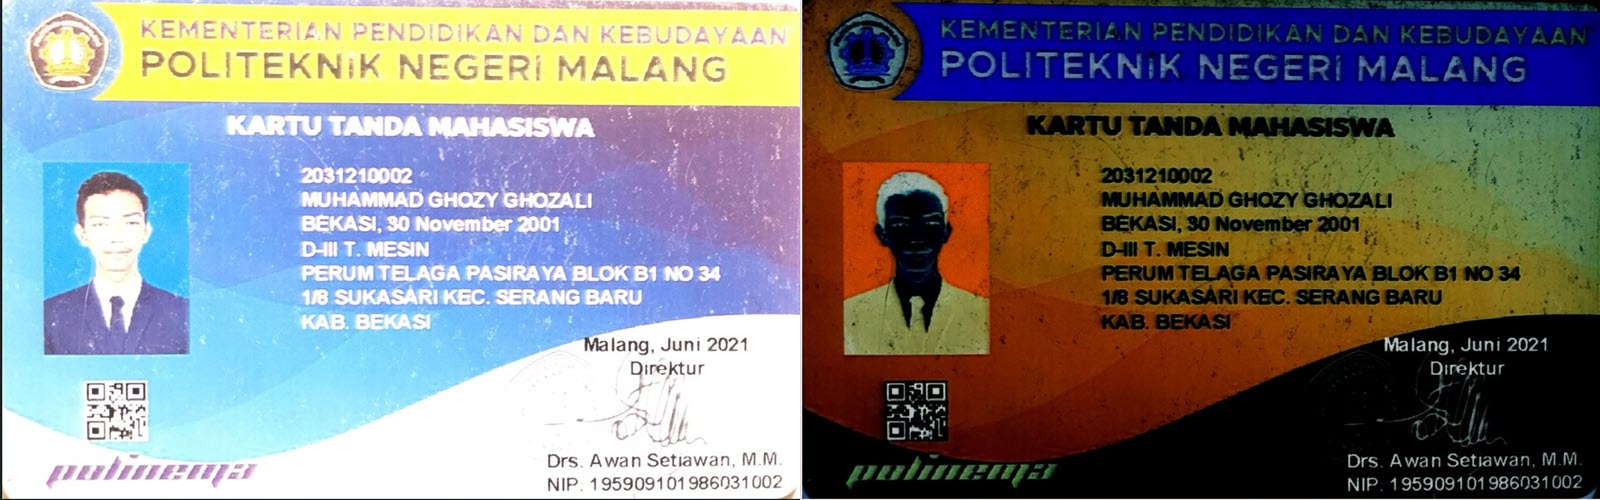

In [9]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

img = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_06/Gambar/KTM lama.jpg')

if img is None:
    print("Gambar tidak ditemukan, cek path lagi")
else:
    # Implementasi inverse citra (manual per pixel)
    L = 256
    inverse_img = np.zeros(img.shape, dtype=np.uint8)

    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            inverse_img[y, x] = L - 1 - img[y, x]

    # Alternatif cara cepat tanpa loop
    # inverse_img = 255 - img

    # Gabungkan untuk perbandingan
    final = cv.hconcat([img, inverse_img])
    cv2_imshow(final)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras

Mengubah kontras dan brightness citra
-------------------------------------
Masukkan tingkat brightness [-255 - 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


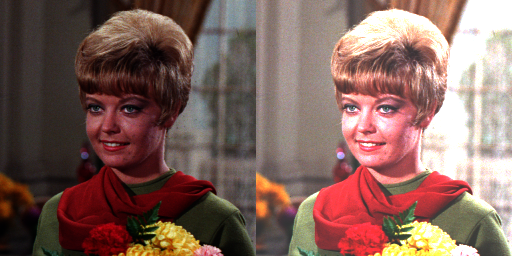

In [10]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print('Mengubah kontras dan brightness citra')
print('-------------------------------------')

try:
    brightness = int(input('Masukkan tingkat brightness [-255 - 255]: '))   # kecerahan
    kontras = float(input('Masukkan kontras [1.0 - 3.0]: '))                # kontras
except ValueError:
    print("Input salah, gunakan angka!")
    brightness = 0
    kontras = 1.0

img = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_06/Gambar/female.tiff')

if img is None:
    print("Gambar tidak ditemukan, cek path lagi")
else:
    # Implementasi kontras + brightness (manual per pixel)
    hasil = np.zeros(img.shape, dtype=np.uint8)

    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            for c in range(img.shape[2]):   # loop channel warna (B, G, R)
                new_value = kontras * img[y, x, c] + brightness
                hasil[y, x, c] = np.clip(new_value, 0, 255)

    # Alternatif cara cepat tanpa loop
    # hasil = cv.convertScaleAbs(img, alpha=kontras, beta=brightness)

    # Gabungkan untuk perbandingan
    final = cv.hconcat([img, hasil])
    cv2_imshow(final)


3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log

Mengubah tingkat kecerahan citra dengan Transformasi Log
--------------------------------------------------------
Masukkan nilai kecerahan: 50


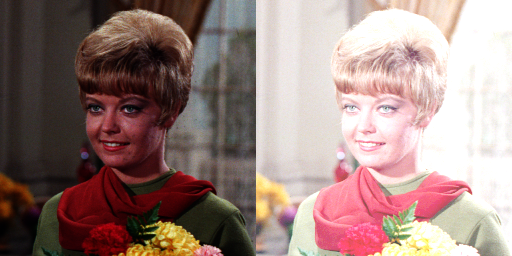

In [17]:
print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('--------------------------------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, input tidak valid')
  brightness = 0

# Baca gambar
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_06/Gambar/female.tiff')
log_img = np.zeros(img.shape, img.dtype)

# Akses per piksel
for y in range(img.shape[0]):
  for x in range(img.shape[1]):
    for c in range(img.shape[2]):
      # Transformasi log + brightness
      value = np.log1p(img[y, x, c]) * (255 / np.log(256)) + brightness
      log_img[y, x, c] = np.clip(value, 0, 255)

# Gabungkan hasil
final = cv.hconcat([img, log_img])
cv2_imshow(final)

4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:
Gunakan Gambar KTM

Konversi ke Grayscale (Averaging, Lightness, Luminance)
-------------------------------------------------------
a. Averaging


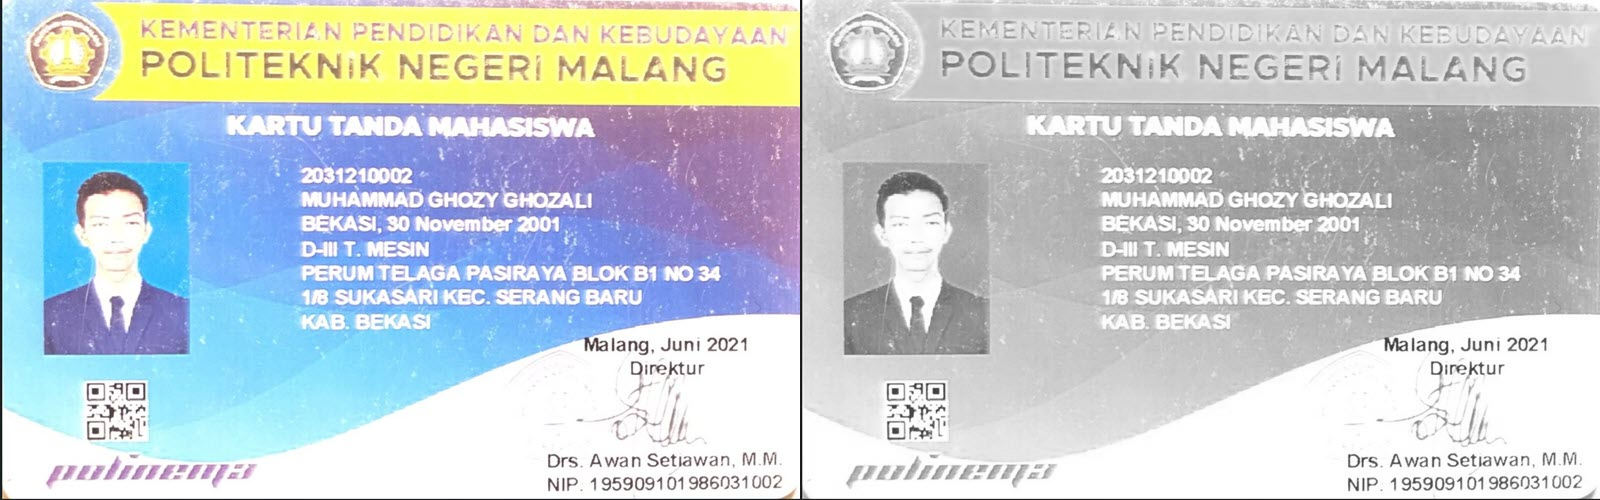

b. Lightness


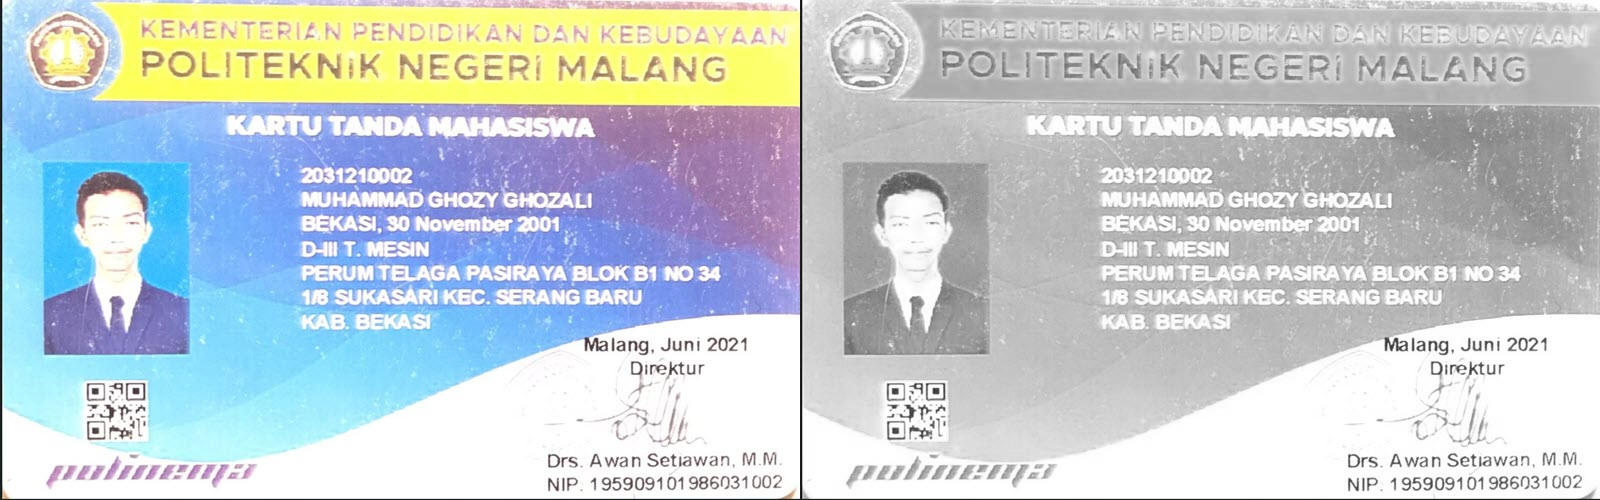

c. Luminance


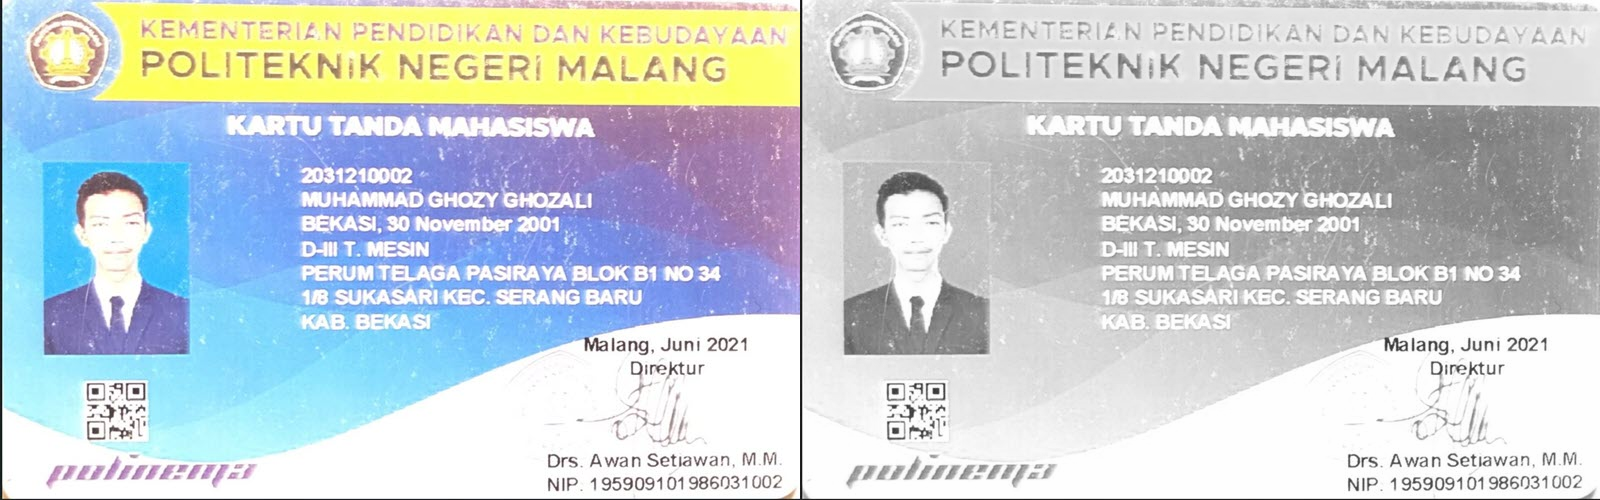

In [20]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print('Konversi ke Grayscale (Averaging, Lightness, Luminance)')
print('-------------------------------------------------------')

img = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_06/Gambar/KTM lama.jpg')

gray_avg = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
gray_light = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
gray_lumi = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)

# Loop per piksel
for y in range(img.shape[0]):
  for x in range(img.shape[1]):
    R, G, B = img[y, x]

    # Averaging
    gray_avg[y, x] = np.clip((int(R) + int(G) + int(B)) / 3, 0, 255)

    # Lightness
    gray_light[y, x] = np.clip((int(max(R, G, B)) + int(min(R, G, B))) / 2, 0, 255)

    # Luminance
    gray_lumi[y, x] = np.clip(0.21*int(R) + 0.72*int(G) + 0.07*int(B), 0, 255)

# Gabungkan hasil dengan citra asli
final_avg   = cv.hconcat([img, cv.cvtColor(gray_avg, cv.COLOR_GRAY2BGR)])
final_light = cv.hconcat([img, cv.cvtColor(gray_light, cv.COLOR_GRAY2BGR)])
final_lumi  = cv.hconcat([img, cv.cvtColor(gray_lumi, cv.COLOR_GRAY2BGR)])

print("a. Averaging")
cv2_imshow(final_avg)

print("b. Lightness")
cv2_imshow(final_light)

print("c. Luminance")
cv2_imshow(final_lumi)


5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale

Ubah bagian lain yang tidak berwarna biru menjadi grayscale
-----------------------------------------------------------


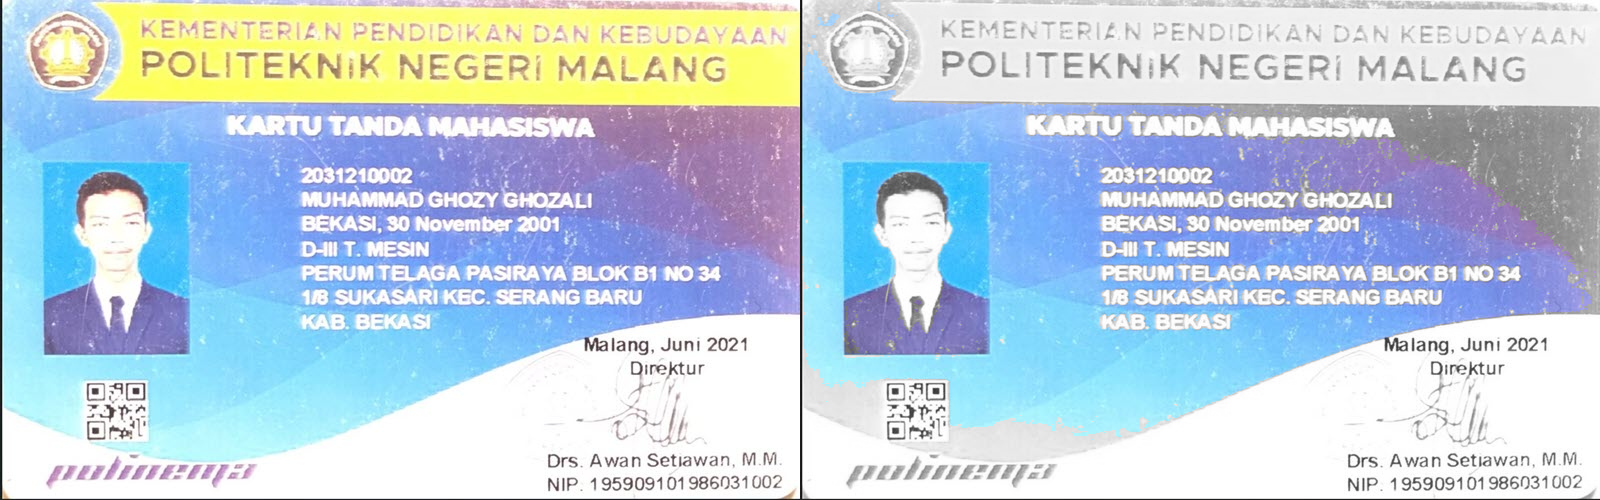

In [21]:
print('Ubah bagian lain yang tidak berwarna biru menjadi grayscale')
print('-----------------------------------------------------------')

img = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_06/Gambar/KTM lama.jpg')

# Konversi ke HSV
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Range warna biru
lower_blue = (90, 80, 50)
upper_blue = (140, 255, 255)

mask = cv.inRange(hsv, lower_blue, upper_blue)

# Buat grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_rgb = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

# Gabungkan hasil
color_part = cv.bitwise_and(img, img, mask=mask)
inv_mask = cv.bitwise_not(mask)
gray_part = cv.bitwise_and(gray_rgb, gray_rgb, mask=inv_mask)
final_img = cv.add(color_part, gray_part)

final = cv.hconcat([img, final_img])
cv2_imshow(final)